In [15]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
file_path = 'combined_results.csv'
df = pd.read_csv(file_path)

# 데이터 확인
df.head()

# 종속 변수와 독립 변수 설정
X = df[['Group', 'LSTM', 'conv', 'augmented', 'frame']]
Y = df['accuracy']

# 회귀 분석 모델 적합
print('OLS Regression Results (Accuracy)')
model = sm.OLS(Y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())
print('=======================================================================================')
print('\n\n\n')
print('OLS Regression Results (ECE)')
# 종속 변수와 독립 변수 설정
X = df[['Group', 'LSTM', 'conv', 'augmented', 'frame']]
Y = df['ECE']

# 회귀 분석 모델 적합
model = sm.OLS(Y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())


OLS Regression Results (Accuracy)
                                 OLS Regression Results                                
Dep. Variable:               accuracy   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              568.3
Date:                Sun, 09 Jun 2024   Prob (F-statistic):                   2.92e-145
Time:                        15:39:56   Log-Likelihood:                         -40.023
No. Observations:                 288   AIC:                                      90.05
Df Residuals:                     283   BIC:                                      108.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

In [16]:
# 기본 통계 요약
summary_stats = df.describe()
print(summary_stats)
print('==============================================================================')

           Group       LSTM        conv  augmented       frame    accuracy  \
count  288.00000  288.00000  288.000000  288.00000  288.000000  288.000000   
mean     0.50000    0.50000    3.500000    0.50000    6.000000    0.923353   
std      0.50087    0.50087    1.710798    0.50087    3.421596    0.030575   
min      0.00000    0.00000    1.000000    0.00000    1.000000    0.697339   
25%      0.00000    0.00000    2.000000    0.00000    3.000000    0.917226   
50%      0.50000    0.50000    3.500000    0.50000    6.000000    0.928331   
75%      1.00000    1.00000    5.000000    1.00000    9.000000    0.941144   
max      1.00000    1.00000    6.000000    1.00000   11.000000    0.955556   

              ECE  
count  288.000000  
mean     0.513792  
std      0.079425  
min      0.369200  
25%      0.474464  
50%      0.494365  
75%      0.518294  
max      0.990077  


In [17]:
# 상관 계수 행렬
correlation_matrix = df.corr()
"""
            Group              LSTM              conv            augmented          frame          accuracy         ECE      
Group    1.000000e+00,     3.546546e-17,    -3.069822e-17,     3.083953e-17,    -6.229934e-17,    -0.065000,    -0.021783
frame    3.546546e-17,     1.000000e+00,    -3.250400e-17,     2.467162e-17,     9.028889e-18,    -0.046270,    -0.046241
LSTM    -3.069822e-17,    -3.250400e-17,     1.000000e+00,     3.566411e-17,    -1.564886e-16,    -0.028995,     0.044185
augment  3.083953e-17,     2.467162e-17,     3.566411e-17,     1.000000e+00,     1.616171e-16,    -0.021867,    -0.156874
conv    -6.229934e-17,     9.028889e-18,    -1.564886e-16,     1.616171e-16,     1.000000e+00,     0.014138,    -0.262099
acc     -6.499983e-02,    -4.626967e-02,    -2.899483e-02,    -2.186741e-02,     1.413817e-02,     1.000000,    -0.252464
ECE     -2.178255e-02,    -4.624114e-02,     4.418548e-02,    -1.568738e-01,    -2.620994e-01,    -0.252464,     1.000000
"""

'\n            Group              LSTM              conv            augmented          frame          accuracy         ECE      \nGroup    1.000000e+00,     3.546546e-17,    -3.069822e-17,     3.083953e-17,    -6.229934e-17,    -0.065000,    -0.021783\nframe    3.546546e-17,     1.000000e+00,    -3.250400e-17,     2.467162e-17,     9.028889e-18,    -0.046270,    -0.046241\nLSTM    -3.069822e-17,    -3.250400e-17,     1.000000e+00,     3.566411e-17,    -1.564886e-16,    -0.028995,     0.044185\naugment  3.083953e-17,     2.467162e-17,     3.566411e-17,     1.000000e+00,     1.616171e-16,    -0.021867,    -0.156874\nconv    -6.229934e-17,     9.028889e-18,    -1.564886e-16,     1.616171e-16,     1.000000e+00,     0.014138,    -0.262099\nacc     -6.499983e-02,    -4.626967e-02,    -2.899483e-02,    -2.186741e-02,     1.413817e-02,     1.000000,    -0.252464\nECE     -2.178255e-02,    -4.624114e-02,     4.418548e-02,    -1.568738e-01,    -2.620994e-01,    -0.252464,     1.000000\n'

Group별 accuracy 평균, 0=Group 사용 안함 // 1 = Group 사용함
Group
0    0.925337
1    0.921369
Name: accuracy, dtype: float64


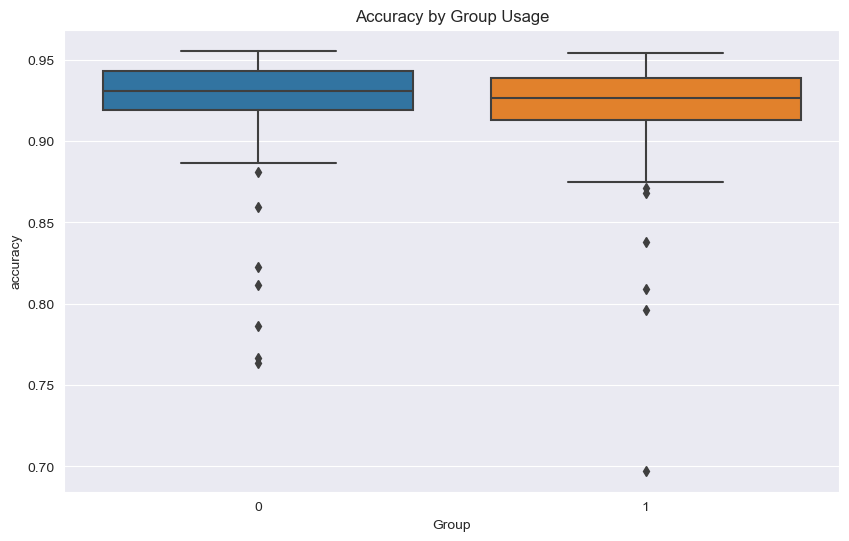

In [18]:
# Group에 따른 accuracy 평균 계산
group_Group = df.groupby('Group')['accuracy'].mean()
print("Group별 accuracy 평균, 0=Group 사용 안함 // 1 = Group 사용함")
print(group_Group)
print('==============================================================================')
# Boxplot으로 accuracy 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='accuracy', data=df)
plt.title('Accuracy by Group Usage')
plt.show()

LSTM별 accuracy 평균 0=LSTM 사용 안함 // 1 = LSTM 사용함
LSTM
0    0.924766
1    0.921941
Name: accuracy, dtype: float64


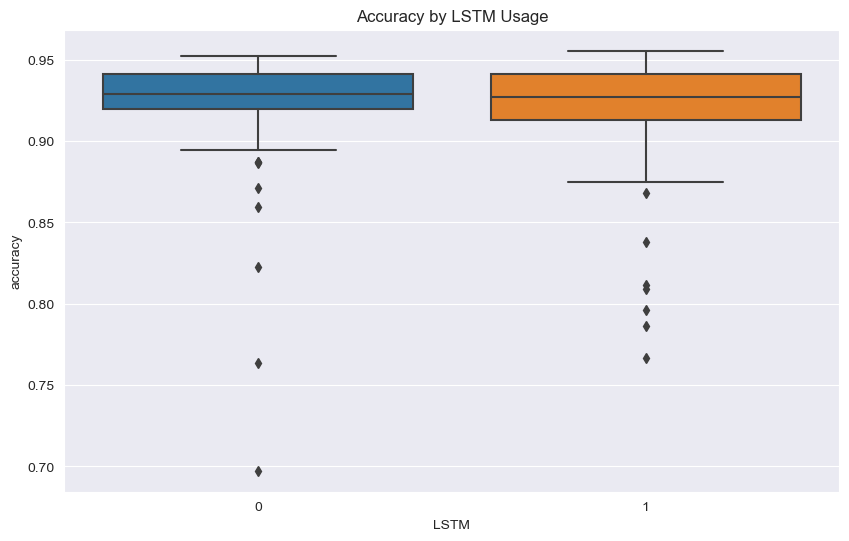

In [19]:
# LSTM에 따른 accuracy 평균 계산
LSTM_Group = df.groupby('LSTM')['accuracy'].mean()
print("LSTM별 accuracy 평균", "0=LSTM 사용 안함 // 1 = LSTM 사용함")
print(LSTM_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='LSTM', y='accuracy', data=df)
plt.title('Accuracy by LSTM Usage')
plt.show()

augmented별 accuracy 평균 0=augmented 사용 안함 // 1 = augmented 사용함
augmented
0    0.924021
1    0.922686
Name: accuracy, dtype: float64


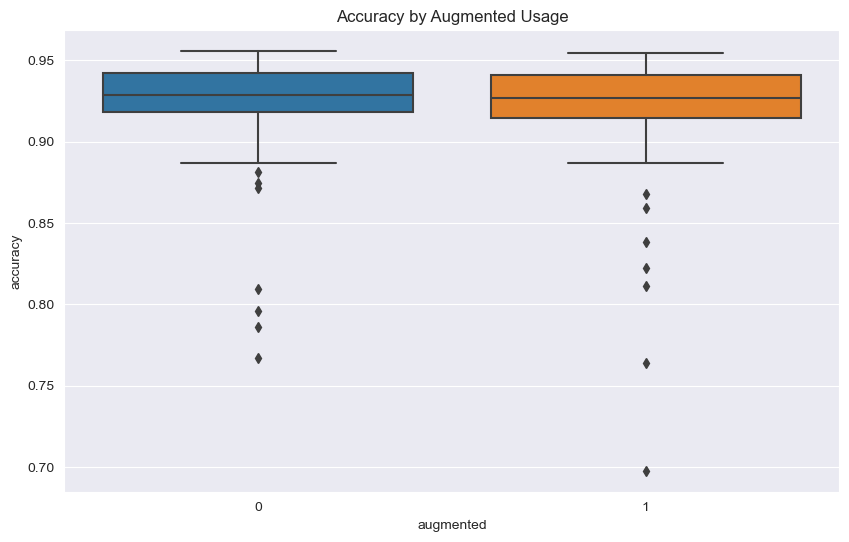

In [20]:
# augmented에 따른 accuracy 평균 계산
augmented_Group = df.groupby('augmented')['accuracy'].mean()
print("augmented별 accuracy 평균", "0=augmented 사용 안함 // 1 = augmented 사용함")
print(augmented_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='augmented', y='accuracy', data=df)
plt.title('Accuracy by Augmented Usage')
plt.show()

conv별 accuracy 평균
conv
1    0.928928
2    0.921981
3    0.923168
4    0.916604
5    0.924091
6    0.925348
Name: accuracy, dtype: float64


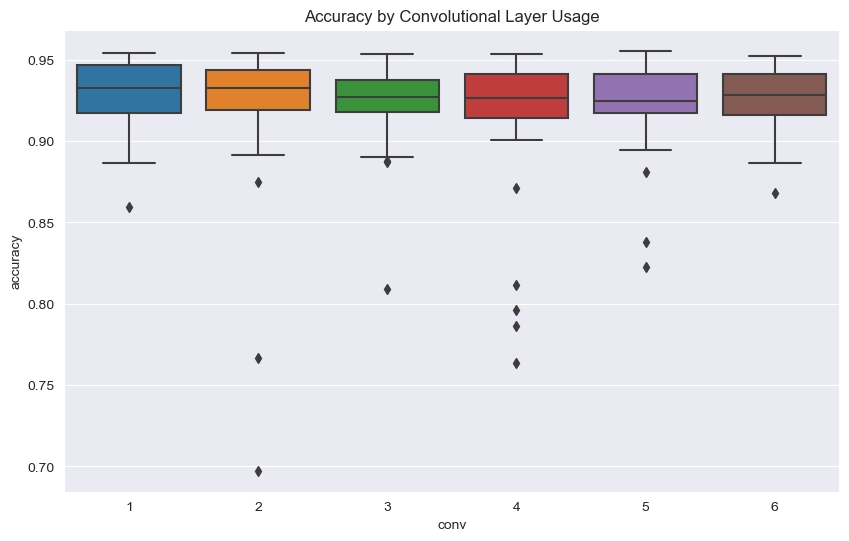

In [21]:
# conv에 따른 accuracy 평균 계산
conv_Group = df.groupby('conv')['accuracy'].mean()
print("conv별 accuracy 평균")
print(conv_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='conv', y='accuracy', data=df)
plt.title('Accuracy by Convolutional Layer Usage')
plt.show()

frame별 accuracy 평균
frame
1     0.894979
3     0.942245
5     0.942302
7     0.927293
9     0.920512
11    0.912790
Name: accuracy, dtype: float64


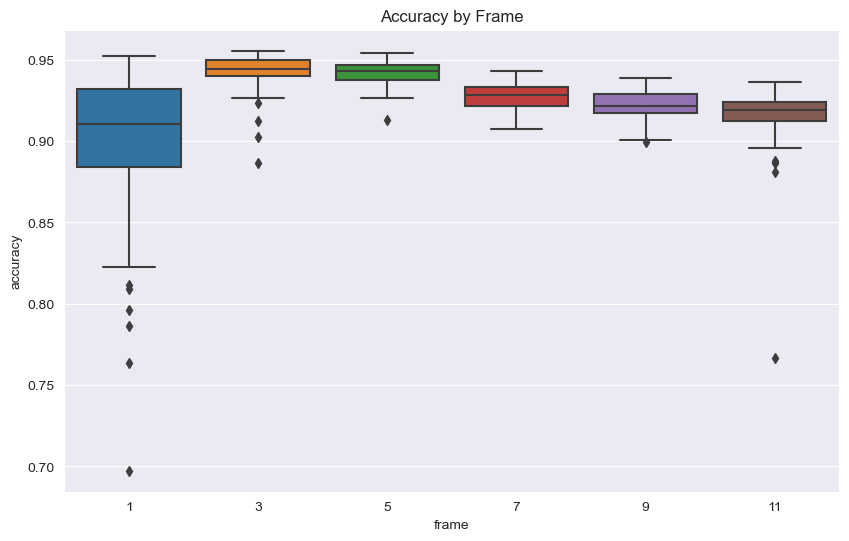

In [22]:
# frame에 따른 accuracy 평균 계산
frame_Group = df.groupby('frame')['accuracy'].mean()
print("frame별 accuracy 평균")
print(frame_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='frame', y='accuracy', data=df)
plt.title('Accuracy by Frame')
plt.show()

ece_group_Group
Group
0    0.515519
1    0.512065
Name: ECE, dtype: float64


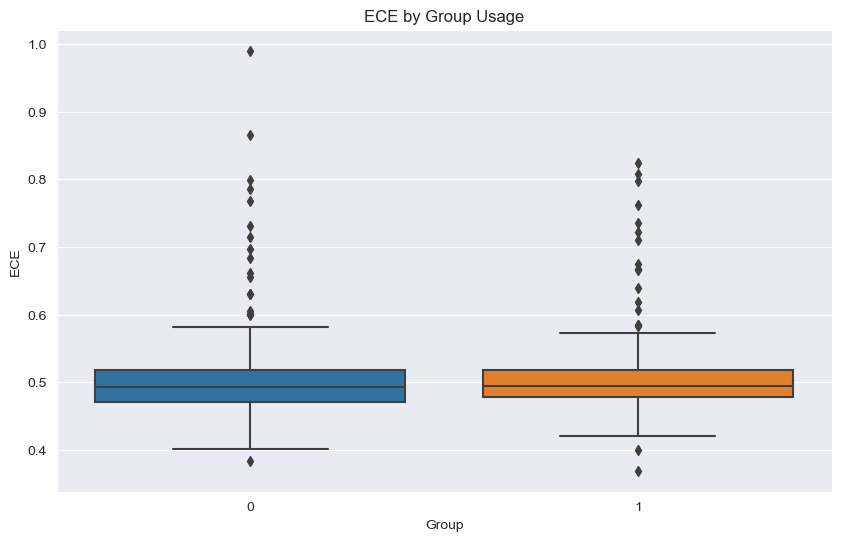

In [23]:
# Group by group usage and calculate mean ECE
ece_group_Group = df.groupby('Group')['ECE'].mean()
print("ece_group_Group")
print(ece_group_Group)
print('==============================================================================')
# Boxplot of accuracy by Group usage
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='ECE', data=df)
plt.title('ECE by Group Usage')
# plt.show()
plt.savefig("ECE_By_Group_Usage.png")

ece_LSTM_Group
LSTM
0    0.517458
1    0.510126
Name: ECE, dtype: float64


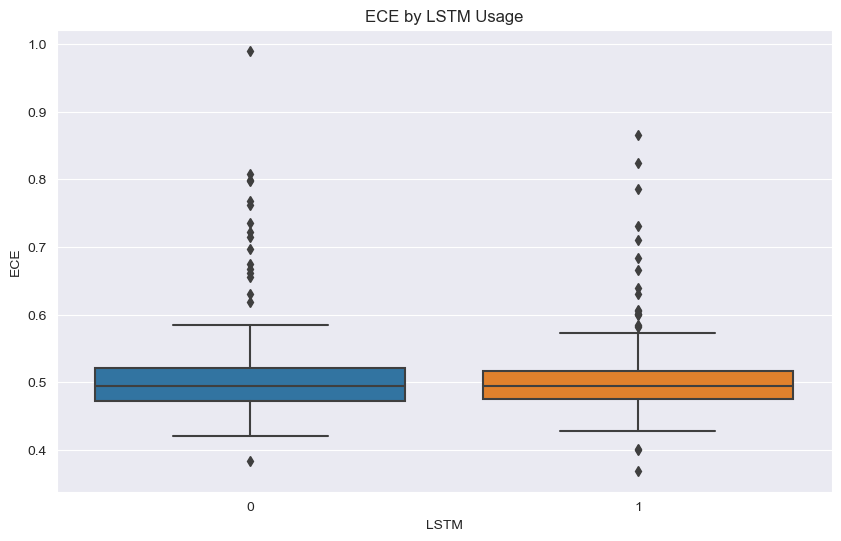

In [24]:
# Group by LSTM usage and calculate mean ECE
ece_LSTM_Group = df.groupby('LSTM')['ECE'].mean()
print("ece_LSTM_Group")
print(ece_LSTM_Group)
print('==============================================================================')
# Boxplot of accuracy by LSTM usage
plt.figure(figsize=(10, 6))
sns.boxplot(x='LSTM', y='ECE', data=df)
plt.title('ECE by LSTM Usage')
# plt.show()
plt.savefig("ECE_By_LSTM_Usage.png")

ece_augmented_Group
augmented
0    0.526230
1    0.501354
Name: ECE, dtype: float64


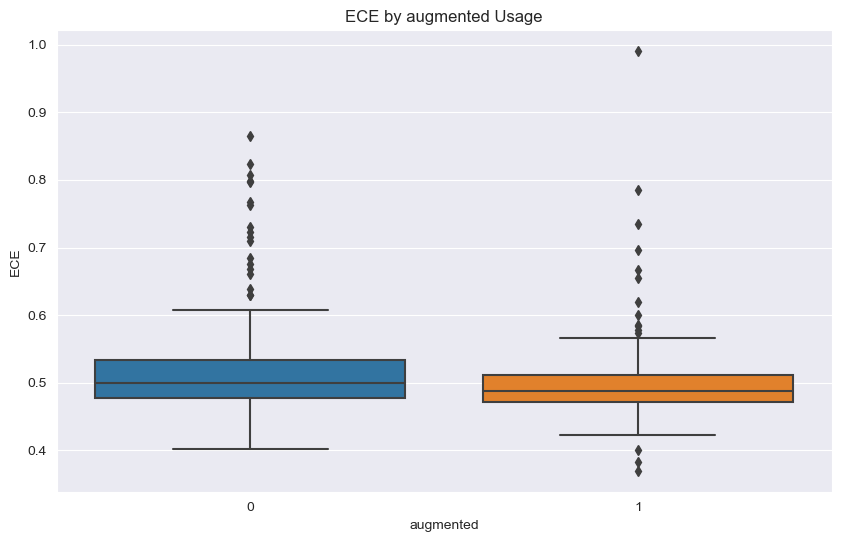

In [25]:
# Group by augmented usage and calculate mean ECE
ece_augmented_Group = df.groupby('augmented')['ECE'].mean()
print("ece_augmented_Group")
print(ece_augmented_Group)
print('==============================================================================')
# Boxplot of accuracy by augmented usage
plt.figure(figsize=(10, 6))
sns.boxplot(x='augmented', y='ECE', data=df)
plt.title('ECE by augmented Usage')
# plt.show()
plt.savefig("ECE_By_Augmented_Usage.png")

ece_conv_Group
conv
1    0.509813
2    0.517342
3    0.508870
4    0.511395
5    0.503148
6    0.532184
Name: ECE, dtype: float64


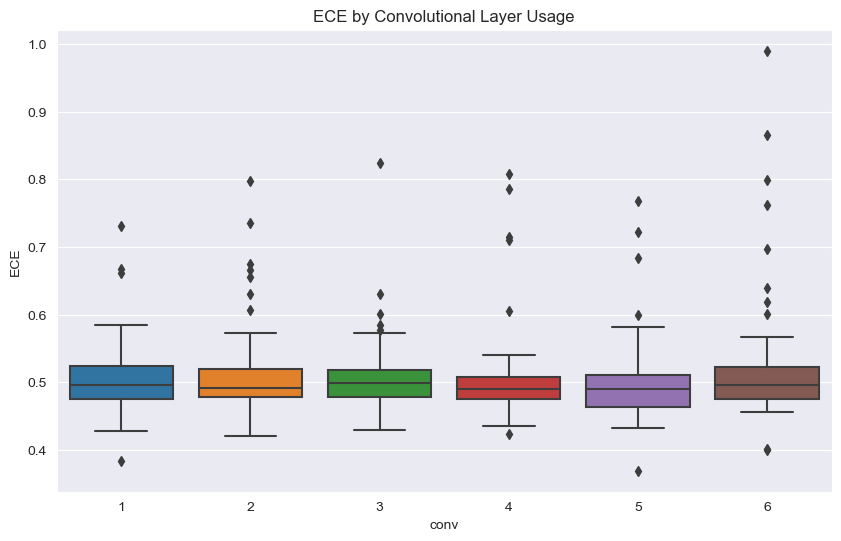

In [26]:
# Group by conv and calculate mean ECE
ece_conv_Group = df.groupby('conv')['ECE'].mean()
print("ece_conv_Group")
print(ece_conv_Group)
print('==============================================================================')
# Boxplot of accuracy by conv
plt.figure(figsize=(10, 6))
sns.boxplot(x='conv', y='ECE', data=df)
plt.title('ECE by Convolutional Layer Usage')
# plt.show()
plt.savefig("ECE_By_Convolutional_Layer.png")

ece_frame_Group
frame
1     0.590793
3     0.486101
5     0.518045
7     0.473646
9     0.520029
11    0.494139
Name: ECE, dtype: float64


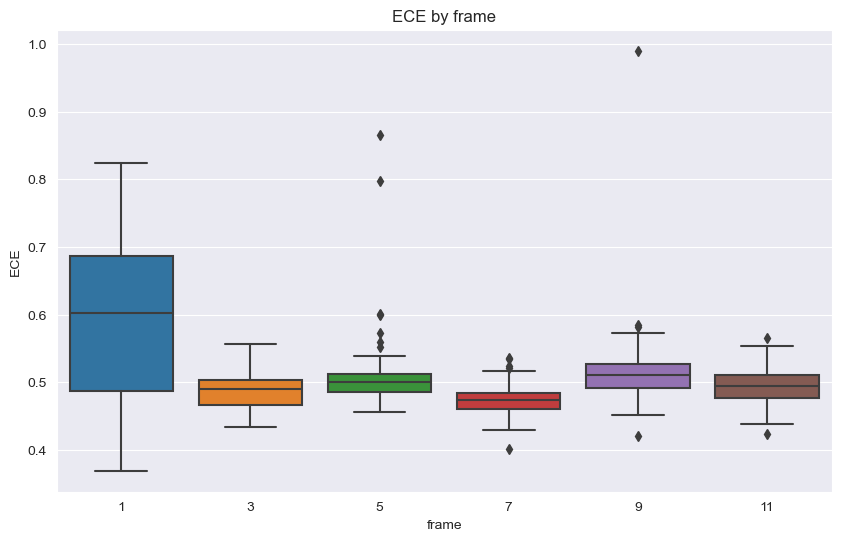

In [27]:
# Group by frame and calculate mean ECE
ece_frame_Group = df.groupby('frame')['ECE'].mean()
print("ece_frame_Group")
print(ece_frame_Group)
print('==============================================================================')
# Boxplot of accuracy by frame
plt.figure(figsize=(10, 6))
sns.boxplot(x='frame', y='ECE', data=df)
plt.title('ECE by frame')
# plt.show()
plt.savefig("ECE_By_Frame.png")